In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Load dataset
DATA_PATH = "../data/data.csv"
df = pd.read_csv(DATA_PATH)

# Drop ID column (không mang ý nghĩa học máy)
df = df.drop(columns=["id"])

# Tách feature và label
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"].map({"M": 1, "B": 0})

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (455, 30)
Test size : (114, 30)


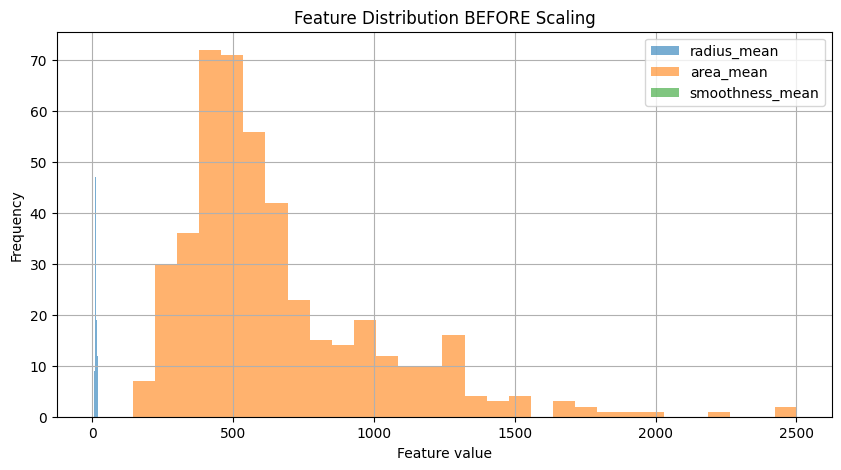

In [18]:
# Chọn 3 feature tiêu biểu
features = ["radius_mean", "area_mean", "smoothness_mean"]

plt.figure(figsize=(10,5))
for f in features:
    plt.hist(X_train[f], bins=30, alpha=0.6, label=f)

plt.title("Feature Distribution BEFORE Scaling")
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển về DataFrame để dễ quan sát
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

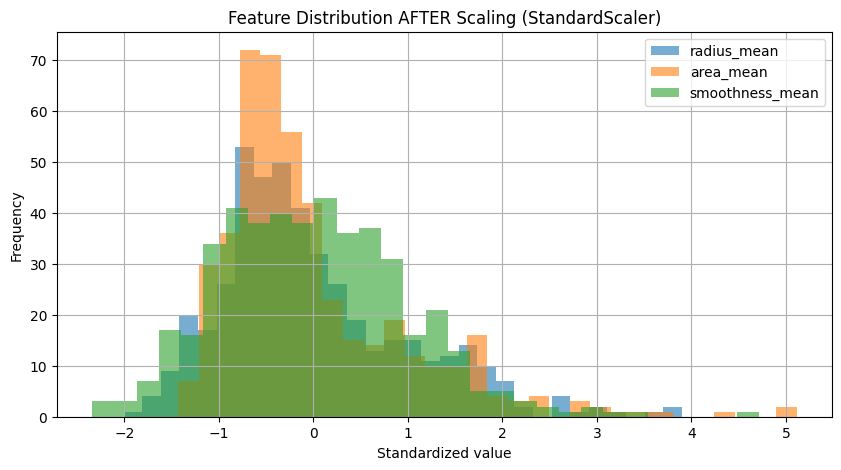

In [20]:
plt.figure(figsize=(10,5))
for f in features:
    plt.hist(X_train_scaled_df[f], bins=30, alpha=0.6, label=f)

plt.title("Feature Distribution AFTER Scaling (StandardScaler)")
plt.xlabel("Standardized value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
X_train_scaled_df[features].describe().loc[["mean", "std"]]

,radius_mean,area_mean,smoothness_mean
mean,-1.737316e-16,-1.171224e-16,7.242070e-16
std,1.001101e+00,1.001101e+00,1.001101e+00
